In [2]:
# PROJECT : Predicting Future Price in the cryptocurrency
# RESEARCHER : Hyun Ho Park
# Created At : 2023-05-29
# Updated At : 2023-05-29

In [ ]:
'''
Need to make function
0. Get coin list
1. Crawl the dataset from website
2. Apply prophet to return future prediction
3. Make predicted documents
'''

In [3]:
'''
Import library
'''

import pandas as pd
import numpy as np
from datetime import datetime

'''
Prophet
'''
from prophet import Prophet

import warnings
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt

from tqdm import tqdm

import gc

print(f'DONE.')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DONE.


In [4]:
data_df = pd.read_csv('./99. csv/btc-usd-max.csv')

In [5]:
data_df.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [6]:
data_df['date'] = data_df["snapped_at"].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S %Z'))
data_df['date'] = data_df['date'].apply(lambda x :x.strftime('%Y-%m-%d'))

In [7]:
import pandas as pd
from datetime import datetime
import gc

train_df = data_df.iloc[-90:].copy()

target_df = train_df[['date', 'price']].rename(columns={
    'date': 'ds',
    'price': 'y'
})
target_df['floor'] = 15000

# Convert 'ds' column to datetime
target_df['ds'] = pd.to_datetime(target_df['ds'])

future_day = 7

last_day = target_df['ds'].iloc[-1]

model = Prophet(daily_seasonality=True, 
                interval_width = 0.8,
                changepoint_range = 0.8,
                changepoint_prior_scale=0.3, seasonality_mode='multiplicative')
model.fit(target_df)

future = model.make_future_dataframe(periods=future_day)
future['floor'] = 15000

temp_df = model.predict(future)

save_df = pd.merge(target_df, temp_df[['ds', 'yhat']], on='ds', how='outer')
gc.collect()

print('FINISHED......\n')


15:23:51 - cmdstanpy - INFO - Chain [1] start processing
15:23:53 - cmdstanpy - INFO - Chain [1] done processing


FINISHED......



<AxesSubplot:>

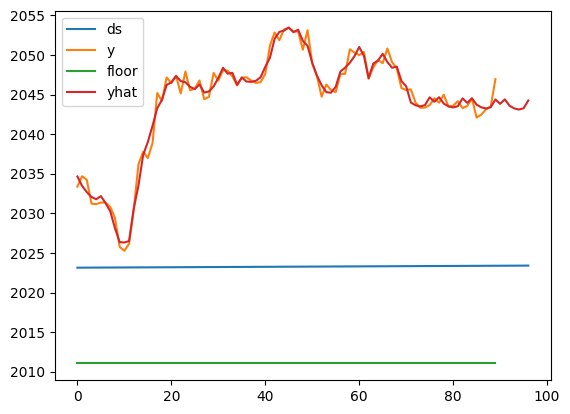

In [10]:
save_df.plot()